In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf

In [2]:
data=pd.read_csv(r"C:\Users\admin\Desktop\ML\Datasets_SL\Demo Datasets\Lesson 8\AirPassengers.csv")

In [6]:
data.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [7]:
data.shape

(144, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [3]:
from datetime import datetime 

In [4]:
data['Month']=pd.to_datetime(data['Month'])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [45]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
data=data.set_index('Month')

In [48]:
data.head(3)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


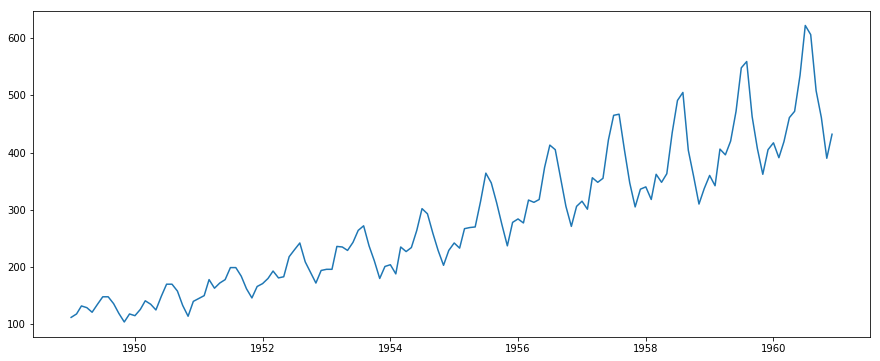

In [15]:
plt.plot(data)

In [6]:
ts_log=np.log(data)
ts=data['#Passengers']

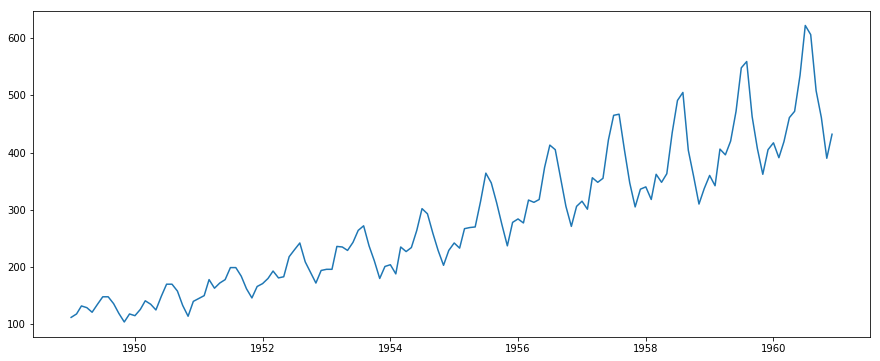

In [17]:
plt.plot(ts)

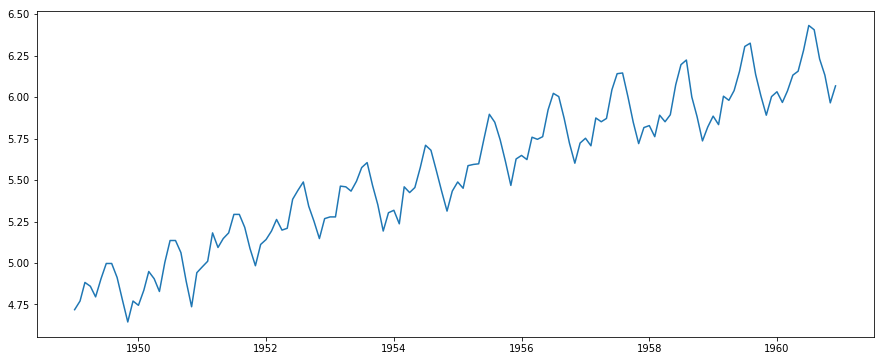

In [18]:
plt.plot(ts_log)

In [7]:
def test_stationarity(timeseries):
   # checking stationarity of time series data-visual
    rolmean=timeseries.rolling(window=52).mean()
    rolstd=timeseries.rolling(window=52).std()
        
    plt.plot(rolmean, c='r', label='Rolmean')
    plt.plot(rolstd,c='g',label='Rolstd')
    plt.plot(timeseries, c='b',label='Original')
    plt.legend()
    plt.title("Time series- to check stationarity")
    plt.show()
    
    #checking stationarity - by statistical test-dickey fuller test
    print("Dickey-Fuller Test")
    print("------------------",end='\n')
    test_stat,p_value,lags,nobs,critical_value,aic=adfuller(timeseries)
    print("Test Stat is {}".format(test_stat))
    print("p_value is {}".format(p_value))
    print("lags is {}".format(lags))
    print("No of obs is {}".format(nobs))
    
    for key,value in critical_value.items():
        print("Critical value-",key,critical_value[key],end='\n')
    print('')
    if p_value < 0.05:
        print("Reject null hypothesis- Data is Stationary")
    else:
        print("Accept null hypothesis- Data is non stationary")

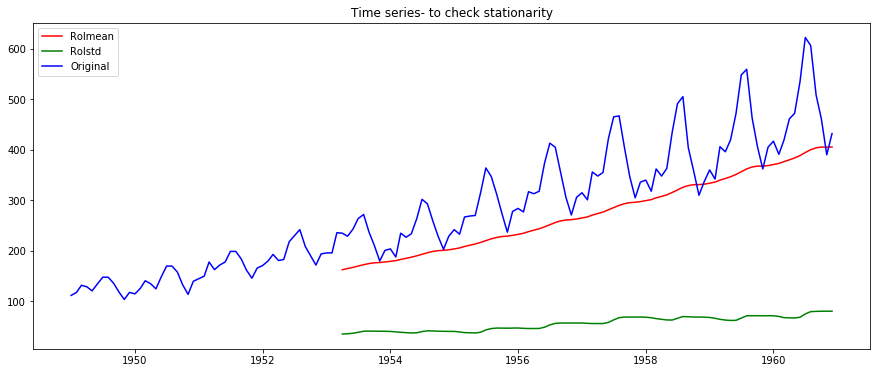

Dickey-Fuller Test
------------------
Test Stat is 0.8153688792060423
p_value is 0.9918802434376409
lags is 13
No of obs is 130
Critical value- 1% -3.4816817173418295
Critical value- 5% -2.8840418343195267
Critical value- 10% -2.578770059171598

Accept null hypothesis- Data is non stationary


In [20]:
# checking stationarity of air passenger data
test_stationarity(ts)

In [8]:
# Apply differencing on the time series data to remove non stationarity

mov_avg=ts_log.rolling(window=12).mean()
ts_log_mv_diff=ts_log - mov_avg
ts_log_mv_diff=ts_log_mv_diff['#Passengers']

In [9]:
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(5)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

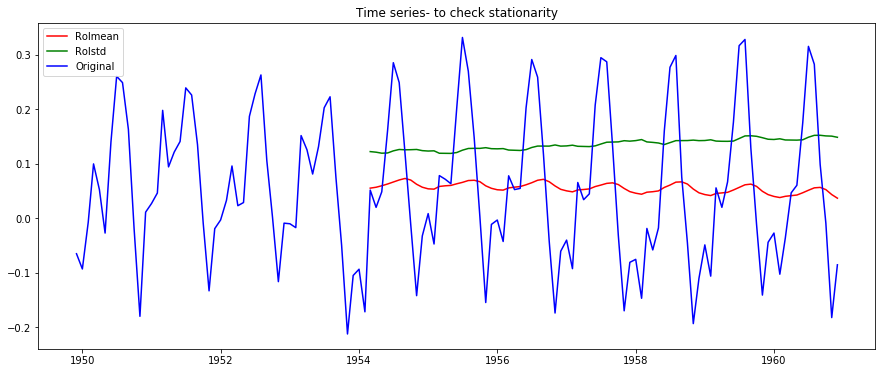

Dickey-Fuller Test
------------------
Test Stat is -3.162907991300858
p_value is 0.022234630001243844
lags is 13
No of obs is 119
Critical value- 1% -3.4865346059036564
Critical value- 5% -2.8861509858476264
Critical value- 10% -2.579896092790057

Reject null hypothesis- Data is Stationary


In [24]:
test_stationarity(ts_log_mv_diff)

Critical value  : our statistic value of -3.162908 is more than the value of -2.886151 at 5%. So this falls in the rejection region. Hence we REJECT the null hypothesis. i.e TS is stationary

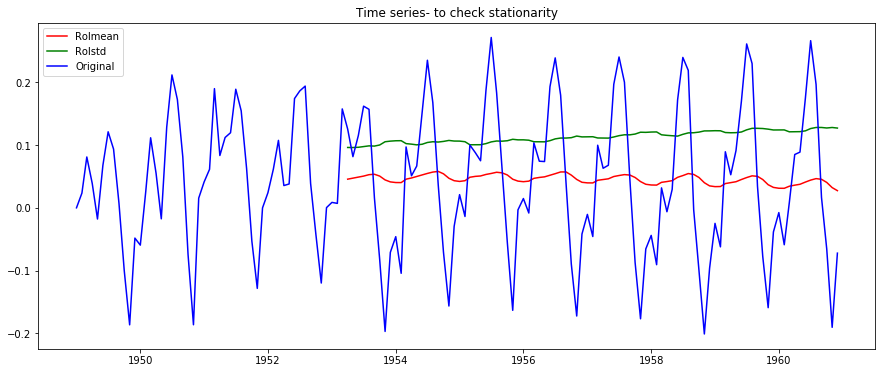

Dickey-Fuller Test
------------------
Test Stat is -3.245608656057642
p_value is 0.01749187315119409
lags is 13
No of obs is 130
Critical value- 1% -3.4816817173418295
Critical value- 5% -2.8840418343195267
Critical value- 10% -2.578770059171598

Reject null hypothesis- Data is Stationary


In [25]:
'''A drawback in this particular approach is that the time-period has to be strictly defined. 
In this case we took yearly averages but in complex situations like forecasting a stock price, 
its difficult to come up with a number. So we take a __‘weighted moving average’__ where more recent values 
are given a higher weight. There can be many technique for assigning weights. A popular one is 
exponentially weighted moving average
where weights are assigned to all the previous values with a decay factor.'''

ewma = pd.Series.ewm
fwd_expwighted_avg = ewma(ts_log, span=10).mean()

ts_log_ewma_diff = ts_log - fwd_expwighted_avg
test_stationarity(ts_log_ewma_diff['#Passengers'])

In [150]:
data.head(4)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129


In [149]:
data['year']=pd.DatetimeIndex(data.index).year
data['month']=pd.DatetimeIndex(data.index).month
data.drop(['year','month'],axis=1,inplace=True)

# To remove trend/seasonality
1. subtract moving average from the data points (whch is done above)
2. subtracy exponential weighted moving average(ewma) which assigns a weighted factor to previous data points with a decay factor.
2. Do differencing ,either first order or second order(where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).)
3. Decomposing- use seasonal_decompose
4. To use detrend function from scipt.stats, only for removing trend

In [11]:
from scipy.signal import detrend

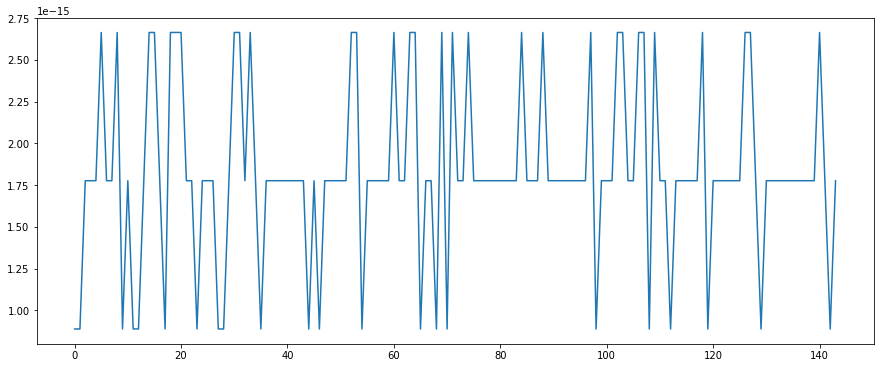

In [30]:
plt.plot(detrend(ts_log))

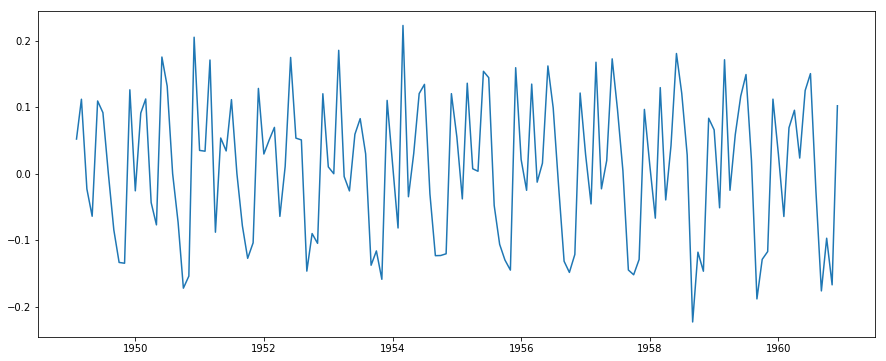

In [31]:
plt.plot(ts_log.diff(1)) # First order differencing  # ts_log- ts_log.shift(1)

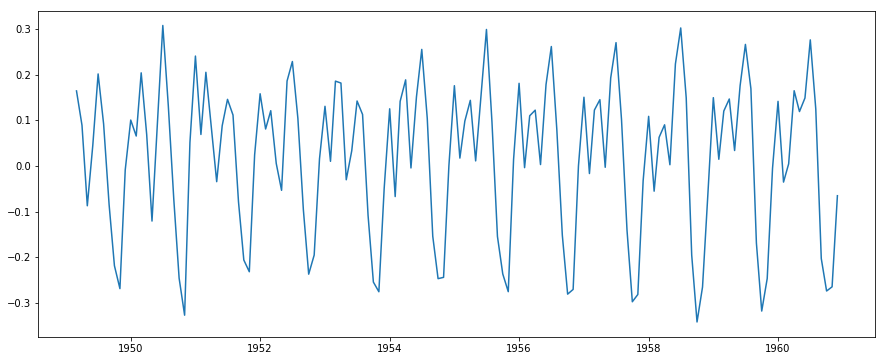

In [32]:
plt.plot(ts_log.diff(2))   # ts_log  -  ts_log.shift(2)

In [17]:
#test_stationarity(pd.Series(detrend(ts_log))['#Passengers'])

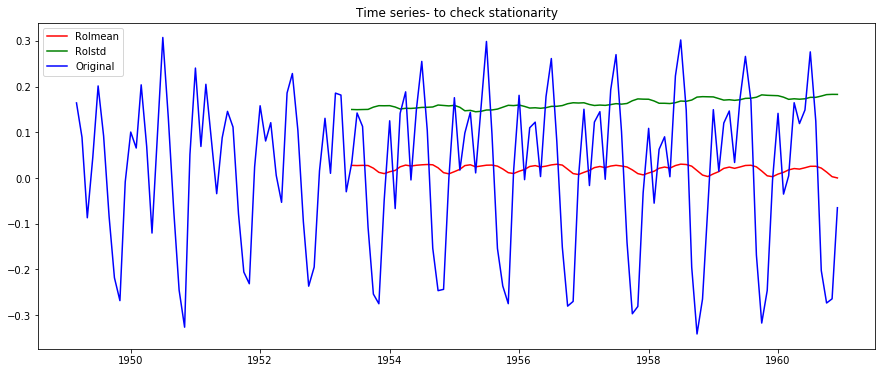

Dickey-Fuller Test
------------------
Test Stat is -3.1679073752887454
p_value is 0.021919114564038708
lags is 11
No of obs is 130
Critical value- 1% -3.4816817173418295
Critical value- 5% -2.8840418343195267
Critical value- 10% -2.578770059171598

Reject null hypothesis- Data is Stationary


In [51]:
test_stationarity(ts_log.diff(2).dropna()['#Passengers'])

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

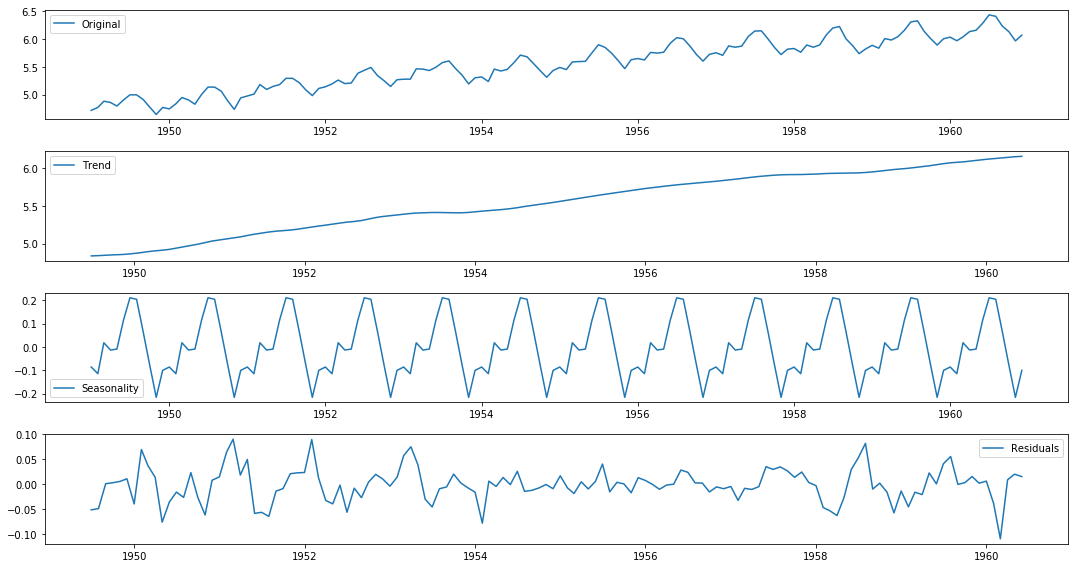

In [45]:
decomposition=seasonal_decompose(ts_log)

trend=decomposition.trend
seasonal=decomposition.seasonal
resid=decomposition.resid

plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

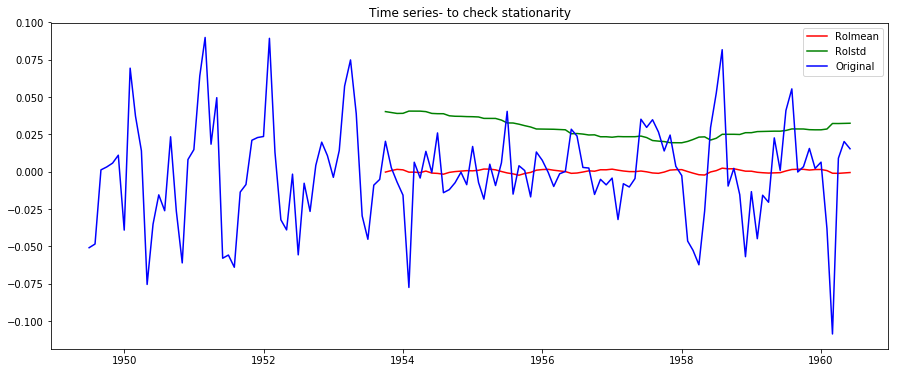

Dickey-Fuller Test
------------------
Test Stat is -6.332386797644867
p_value is 2.8850589033233625e-08
lags is 9
No of obs is 122
Critical value- 1% -3.4851223522012855
Critical value- 5% -2.88553750045158
Critical value- 10% -2.5795685622144586

Reject null hypothesis- Data is Stationary


In [49]:
# we will remove trend and seasonality from the ts data, and only take the residuals

ts_log_decompose=resid
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose['#Passengers'])

In [51]:
'''The Dickey-Fuller test statistic is significantly lower than the 1% critical value. 
So this TS is very close to stationary, with more than 99% confidence level.
But lots of data is removed from ts data, by taking only the residuals'''

'The Dickey-Fuller test statistic is significantly lower than the 1% critical value. \nSo this TS is very close to stationary, with more than 99% confidence level.\nBut lots of data is removed from ts data, by taking only the residuals'

We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. 

# AR model

In [53]:
from pandas.plotting import lag_plot

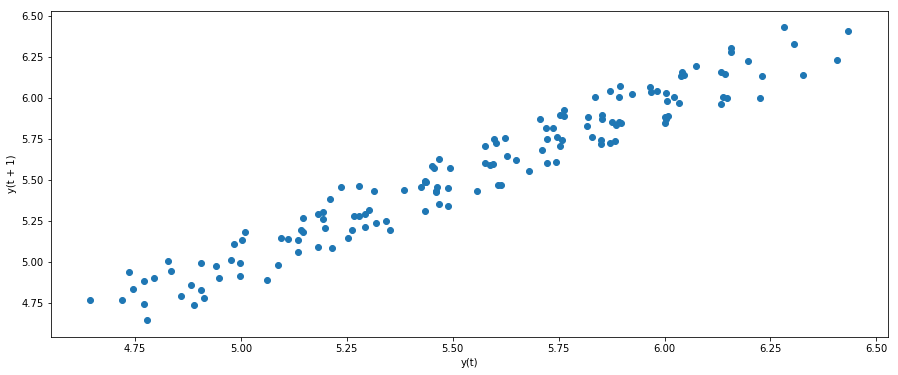

In [55]:
lag_plot(ts_log)

After removing the trend, check whether the ts data is stationary.
Then check whether AR model is suitable by 
1. checking coorelation with successive datapoints
2. autocorrelation plots
3. lag_plot

In [19]:
values=data.values
pd.concat([data.shift(1),data],axis=1).corr()
#data.corr()
# Very high autocorrelaton with previous data points in time series

,#Passengers,#Passengers
#Passengers,1.000000,0.960195
#Passengers,0.960195,1.000000


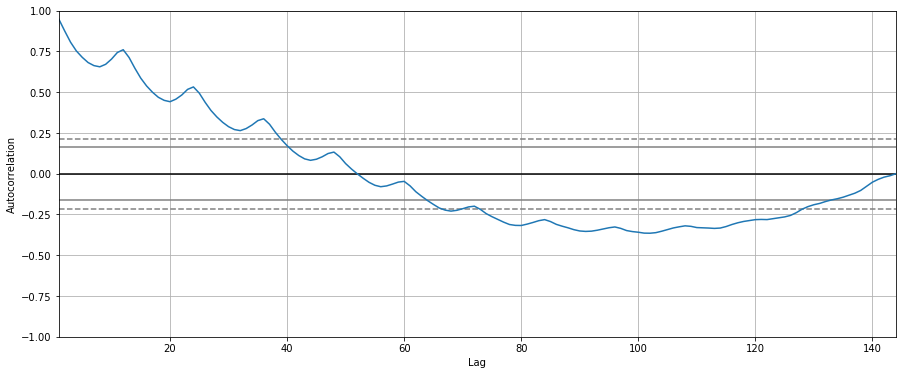

In [35]:
pd.plotting.autocorrelation_plot(data)

In [52]:
#Predicting

In [56]:
x=ts_log_mv_diff.dropna()
len(x)

133

In [68]:
# Extract train and test data
train_data = x[1:len(x) - 12]
test_data  = x[x[len(x) - 12:]]
len(train_data),len(test_data),len(x)

(120, 12, 133)

In [61]:
model=AR(train_data)
model_fitted=model.fit()

In [70]:
predictions=model_fitted.predict(start=120, 
    end=len(train_data) + len(test_data)-1)

In [65]:
ts_log_mv_diff.head(3)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
Name: #Passengers, dtype: float64

In [75]:
compare_df=pd.concat([ts_log_mv_diff.tail(12),predictions],axis=1)
compare_df.columns=['Actual','Predicted with AR']
compare_df

,Actual,Predicted with AR
1960-01-01,-0.027530,-0.022089
1960-02-01,-0.103067,-0.079593
1960-03-01,-0.036530,0.051759
1960-04-01,0.046332,0.018997
1960-05-01,0.060186,0.072609
1960-06-01,0.175033,0.173733
1960-07-01,0.315151,0.299073
1960-08-01,0.282363,0.310063
1960-09-01,0.098235,0.122495
1960-10-01,-0.009230,-0.008426


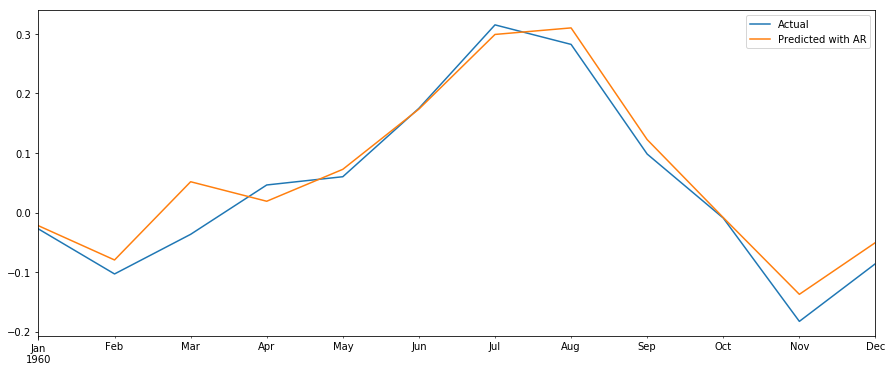

In [76]:
compare_df.plot()

In [78]:
from sklearn.metrics import r2_score
print('r2 score of AR model is :-', r2_score(ts_log_mv_diff.tail(12),predictions))

r2 score of AR model is :- 0.944259250216601


# MA model

It is defined as a weighted average of the previous white noise values.
For instance if q is 5, the predictors for y(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

In [57]:
data.loc['1949-01' :'1949-06'] # Partial location indexing

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135


An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): 

It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

Partial Autocorrelation Function (PACF):

This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf

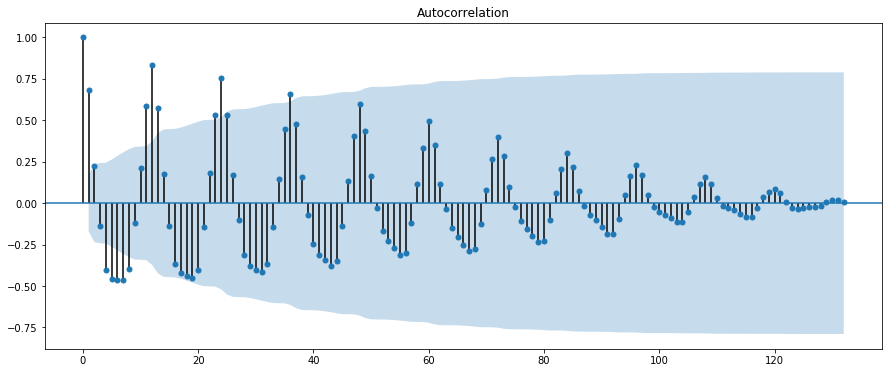

In [74]:
ax=plot_acf(ts_log_mv_diff)

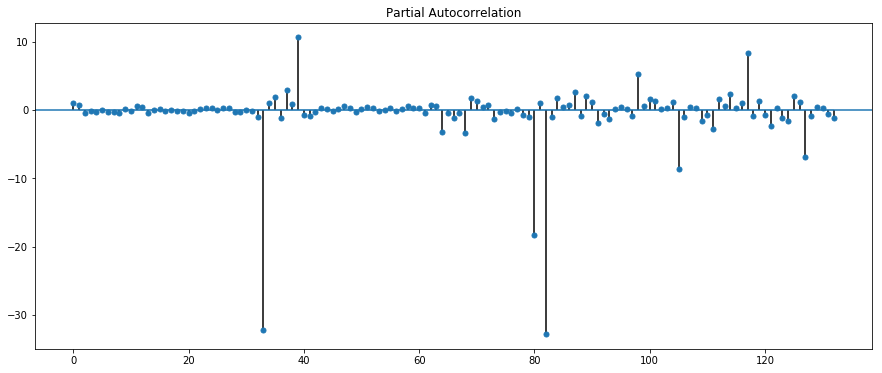

In [75]:
ax=plot_pacf(ts_log_mv_diff)

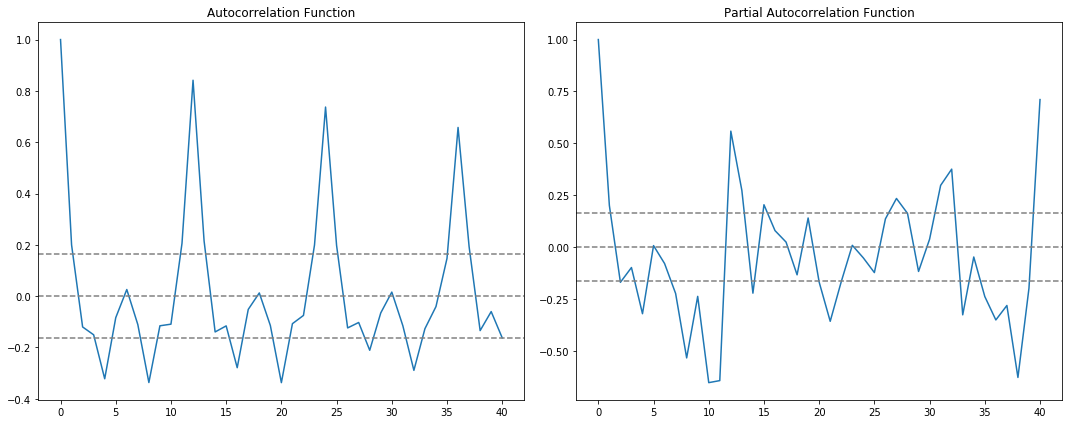

In [86]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

plt.subplot(121)
plt.plot(acf(ts_log_diff))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(pacf(ts_log_diff))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.


q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

# ARIMA model

ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:


Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).


Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.


Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

In [87]:
#AR model using ARIMA

In [88]:
from statsmodels.tsa.arima_model import ARIMA

In [89]:
armod= ARIMA(ts_log,(2,1,0))  # AR term=2, differencing=1, MA term=0

In [90]:
results_ar=armod.fit()

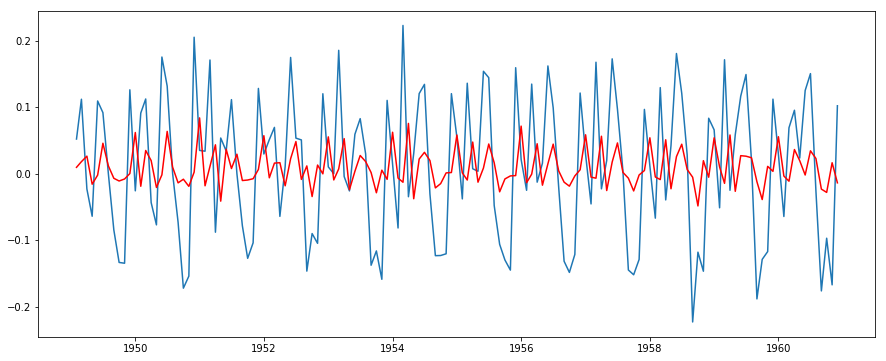

In [128]:
plt.plot(ts_log_diff)
plt.plot(results_ar.fittedvalues,color='red')
#print('RSS: %.4f'% sum((results_ar.fittedvalues[1:]-ts_log_diff)**2))

In [96]:
from sklearn.metrics import r2_score
print("r2 score",r2_score(ts_log_diff,results_ar.fittedvalues))

r2 score 0.06822237855172297


In [97]:
# MA model using ARIMA

r2 score 0.08693059964317229


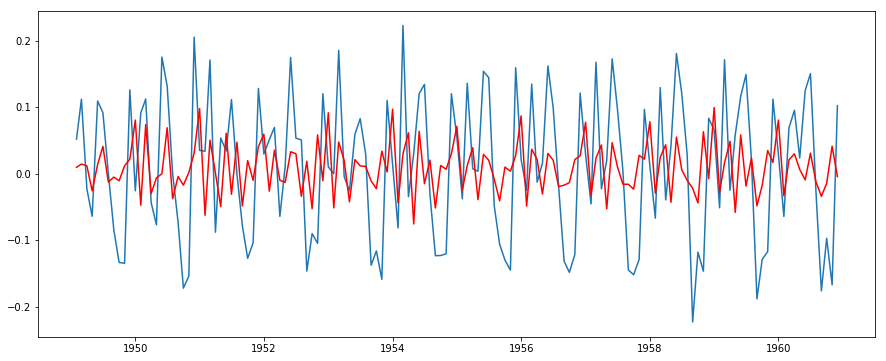

In [101]:
mamodel = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = mamodel.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
print("r2 score",r2_score(ts_log_diff,results_MA.fittedvalues))

In [102]:
# ARIMA

r2 score 0.3616863069936853


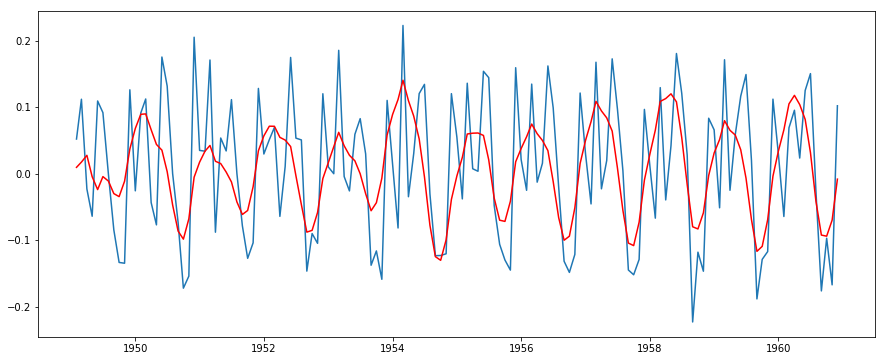

In [133]:
model = ARIMA(ts_log, order=(2, 1, 2))  
model = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(model.fittedvalues, color='red')
#plt.title('RSS: %.4f'% (((results_ARIMA.fittedvalues[1:]-ts_log_diff)**2).mean()))
print("r2 score",r2_score(ts_log_diff,model.fittedvalues))

Text(0.5, 1.0, 'RSS: 0.0173')

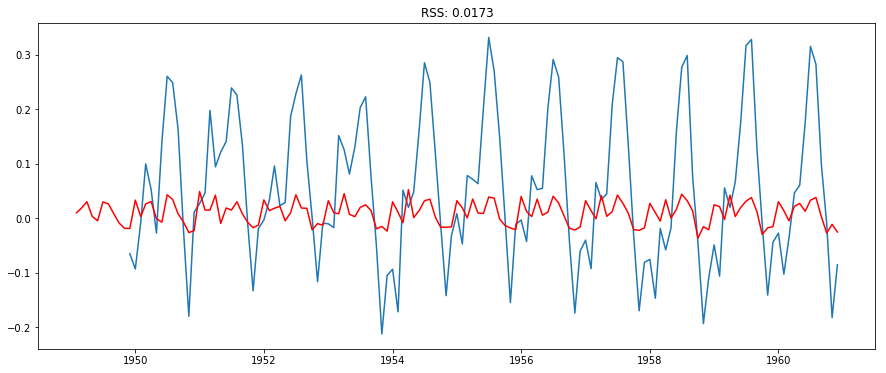

In [126]:
model = ARIMA(ts_log, order=(1, 1, 0)) 
results_ARIMA = model.fit(disp=-1) 
plt.plot(ts_log_mv_diff) 
plt.plot(results_ARIMA.fittedvalues, color='red') 
plt.title('RSS: %.4f'% (((results_ARIMA.fittedvalues[1:]- ts_log_mv_diff)**2).mean())) 

In [134]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True) 
predictions_ARIMA_diff.head() 

Month
1949-02-01    0.009676
1949-03-01    0.018164
1949-04-01    0.030130
1949-05-01    0.003154
1949-06-01   -0.005039
dtype: float64

In [135]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum() 
predictions_ARIMA_diff_cumsum.head() 

Month
1949-02-01    0.009676
1949-03-01    0.027839
1949-04-01    0.057969
1949-05-01    0.061123
1949-06-01    0.056084
dtype: float64

In [136]:
ts_log.ix[0]

#Passengers    4.718499
Name: 1949-01-01 00:00:00, dtype: float64

In [143]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01         NaN
1949-02-01    0.009676
1949-03-01    0.027839
1949-04-01    0.057969
1949-05-01    0.061123
dtype: float64

Text(0.5, 1.0, 'RMSE: nan')

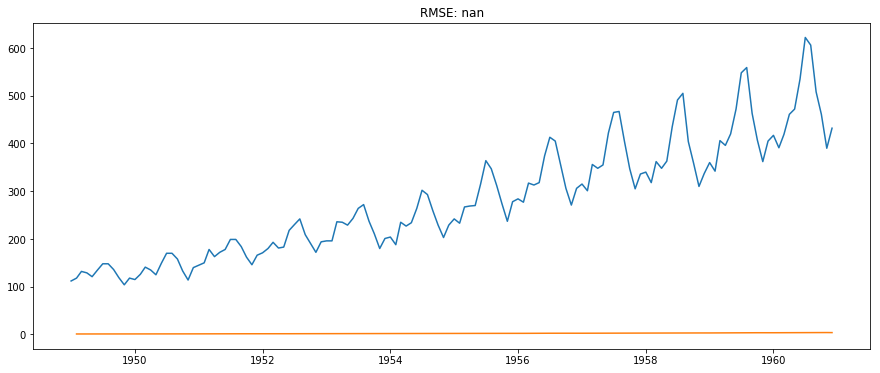

In [144]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [118]:
pred_arima=model.predict(start=120,end=130)

In [119]:
pred_arima

1959-01-01    0.031199
1959-02-01    0.051445
1959-03-01    0.079807
1959-04-01    0.065334
1959-05-01    0.058190
1959-06-01    0.036074
1959-07-01   -0.006667
1959-08-01   -0.069020
1959-09-01   -0.116861
1959-10-01   -0.109304
1959-11-01   -0.069265
Freq: MS, dtype: float64

In [123]:
compare_df_arima=pd.concat([ts_log_diff.iloc[120:130],pred_arima],axis=1)
compare_df_arima.columns=['Actual','Predicted with AR']
compare_df_arima

,Actual,Predicted with AR
1959-01-01,NaN,0.031199
1959-02-01,-0.051293,0.051445
1959-03-01,0.171542,0.079807
1959-04-01,-0.024939,0.065334
1959-05-01,0.058841,0.058190
1959-06-01,0.116724,0.036074
1959-07-01,0.149296,-0.006667
1959-08-01,0.019874,-0.069020
1959-09-01,-0.188422,-0.116861
1959-10-01,-0.128914,-0.109304


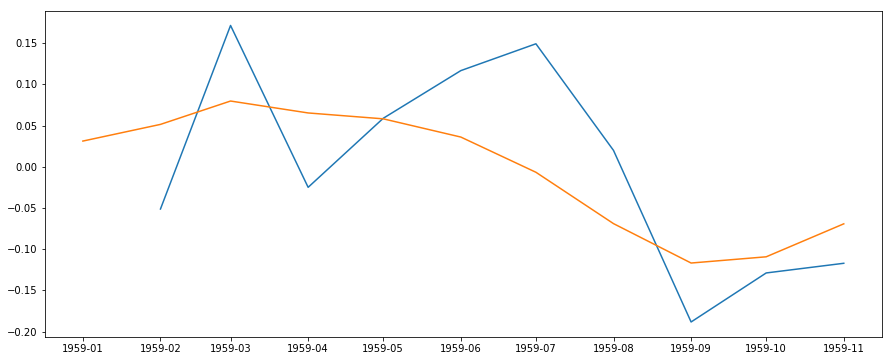

In [124]:
plt.plot(compare_df_arima)

In [125]:
print('R2 score for ARIMA',r2_score(ts_log_diff.iloc[120:130],pred_arima))

ValueError: Found input variables with inconsistent numbers of samples: [10, 11]